In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import datasets
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [2]:
df=pd.read_excel("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/Creditcardclients.xls")

In [3]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
df2=df[1:]
df2.dtypes

Unnamed: 0    object
X1            object
X2            object
X3            object
X4            object
X5            object
X6            object
X7            object
X8            object
X9            object
X10           object
X11           object
X12           object
X13           object
X14           object
X15           object
X16           object
X17           object
X18           object
X19           object
X20           object
X21           object
X22           object
X23           object
Y             object
dtype: object

In [5]:
df2=df2.astype("float64")

In [6]:
df2.isnull().values.any()

False

In [64]:
X=df2.iloc[:,:-1].values
y=df2.iloc[:,-1].values

In [65]:
X

array([[1, 0, 3, 'A/5 21171'],
       [2, 1, 1, 'PC 17599'],
       [3, 1, 3, 'STON/O2. 3101282'],
       ...,
       [889, 0, 3, 'W./C. 6607'],
       [890, 1, 1, '111369'],
       [891, 0, 3, '370376']], dtype=object)

In [66]:
y

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
         8.05  ,  31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,
        18.    ,   7.225 ,  26.    ,  13.    ,   8.0292,  35.5   ,
        21.075 ,  31.3875,   7.225 , 263.    ,   7.8792,   7.8958,
        27.7208, 146.5208,   7.75  ,  10.5   ,  82.1708,  52.    ,
         7.2292,   8.05  ,  18.    ,  11.2417,   9.475 ,  21.    ,
         7.8958,  41.5792,   7.8792,   8.05  ,  15.5   ,   7.75  ,
        21.6792,  17.8   ,  39.6875,   7.8   ,  76.7292,  26.    ,
        61.9792,  35.5   ,  10.5   ,   7.2292,  27.75  ,  46.9   ,
         7.2292,  80.    ,  83.475 ,  27.9   ,  27.7208,  15.2458,
        10.5   ,   8.1583,   7.925 ,   8.6625,  10.5   ,  46.9   ,
        73.5   ,  14.4542,  56.4958,   7.65  ,   7.8958,   8.05  ,
        29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,  47.1   ,
        10.5   ,  15.85  ,  34.375 ,   8.05  , 263.    ,   8.0

## Clasificador knn:

### Hold out

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [9]:
list_accuracy=[]
for i in range(3,50,2):
    clasificador = KNeighborsClassifier(i, algorithm="brute")
    clasificador.fit(X_train, y_train)
    yhat = clasificador.predict(X_test)
    resultado = accuracy_score(y_test, yhat)
    list_accuracy.append(resultado)
print(list_accuracy)

[0.7274444444444444, 0.7466666666666667, 0.7583333333333333, 0.7654444444444445, 0.7656666666666667, 0.7682222222222223, 0.7721111111111111, 0.772, 0.772, 0.7721111111111111, 0.7727777777777778, 0.7731111111111111, 0.7728888888888888, 0.7738888888888888, 0.7735555555555556, 0.7755555555555556, 0.7775555555555556, 0.7764444444444445, 0.7762222222222223, 0.7766666666666666, 0.7767777777777778, 0.7773333333333333, 0.7767777777777778, 0.7768888888888889]


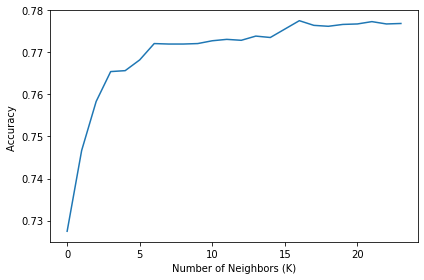

In [10]:
plt.plot(list_accuracy)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout() #Ajusta automáticamente los parámetros de la subtrama
plt.show()

In [11]:
clasificador = KNeighborsClassifier(12, algorithm="brute")
clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)
resultado = accuracy_score(y_test, yhat)
print("Accuracy: ",resultado)

Accuracy:  0.774


In [23]:
print("Jaccard index: " , jaccard_score(y_test, yhat, average="macro"))
print("Exactitud: " , accuracy_score(y_test, yhat))
print("Precisión: ", precision_score(y_test, yhat, average="macro"))
print("Sensibilidad: ", recall_score(y_test, yhat, average="macro"))
print("F1-score: ", f1_score(y_test,yhat, average="macro"))

Jaccard index:  0.42209480689473733
Exactitud:  0.7708888888888888
Precisión:  0.6229761193230983
Sensibilidad:  0.5282252197150914
F1-score:  0.5060670341398759


In [24]:
confusion_matrix(y_test, yhat, labels=[0,1])

array([[6764,  203],
       [1859,  174]])

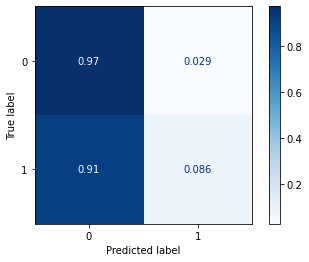

In [25]:
disp = plot_confusion_matrix(clasificador, X_test, y_test,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

Area bajo la curva:  0.6332673934480385


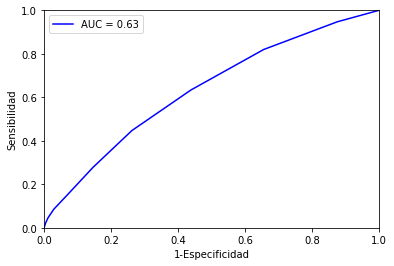

In [26]:
probs = clasificador.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel('Sensibilidad')
plt.xlabel('1-Especificidad')
plt.show()

### Cross validation (k-fold)

In [43]:
clf = KNeighborsClassifier(3)
scores_acc = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(accuracy_score))
scores_Jac = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(jaccard_score))
scores_prec = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(precision_score))
scores_sens = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(recall_score))
scores_f1=cross_val_score(clf, X, y, cv=10, scoring = make_scorer(f1_score))

#print(scores)
#print("*****"*10)
print("Accuracy_score: ", scores_acc.mean())
print("jaccard_score: ", scores_Jac.mean())
print("Precisión: ", scores_prec.mean())
print("Sensibilidad: ", scores_sens.mean())
print("F1-score: ", scores_f1.mean())

Accuracy_score:  0.7292666666666666
jaccard_score:  0.1458984060609505
Precisión:  0.3250534718152972
Sensibilidad:  0.21006333024405316
F1-score:  0.2539988652042225


In [44]:
#Para sacr el report
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
yhat=[]
ytest=[]
xtrain=[]
ytrain=[]
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = neighbors.KNeighborsClassifier(13)
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.extend(yhat1)
    ytest.extend(y_test)
    xtrain.extend(X_train)
    ytrain.extend(y_train)

In [47]:
print(classification_report(yhat, ytest,digits=3))

              precision    recall  f1-score   support

         0.0      0.956     0.792     0.866     28191
         1.0      0.116     0.427     0.183      1809

    accuracy                          0.770     30000
   macro avg      0.536     0.610     0.525     30000
weighted avg      0.905     0.770     0.825     30000



## Clasificador Euclideano:

In [48]:
### Cross validation
clf = neighbors.NearestCentroid()
scores_acc = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(accuracy_score))
scores_Jac = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(jaccard_score))
scores_prec = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(precision_score))
scores_sens = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(recall_score))
scores_f1=cross_val_score(clf, X, y, cv=10, scoring = make_scorer(f1_score))

#print(scores)
#print("*****"*10)
print("Accuracy_score: ", scores_acc.mean())
print("jaccard_score: ", scores_Jac.mean())
print("Precisión: ", scores_prec.mean())
print("Sensibilidad: ", scores_sens.mean())
print("F1-score: ", scores_f1.mean())

Accuracy_score:  0.5356333333333334
jaccard_score:  0.24221261798547045
Precisión:  0.27497816639491607
Sensibilidad:  0.6701352923004235
F1-score:  0.3896934214931075


In [49]:
#Para sacr el report
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
yhat=[]
ytest=[]
xtrain=[]
ytrain=[]
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = neighbors.KNeighborsClassifier(13)
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.extend(yhat1)
    ytest.extend(y_test)
    xtrain.extend(X_train)
    ytrain.extend(y_train)
print(classification_report(yhat, ytest,digits=3))

              precision    recall  f1-score   support

         0.0      0.956     0.792     0.866     28191
         1.0      0.116     0.427     0.183      1809

    accuracy                          0.770     30000
   macro avg      0.536     0.610     0.525     30000
weighted avg      0.905     0.770     0.825     30000



## Clasificador Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
### Cross validation
clf = GaussianNB()
scores_acc = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(accuracy_score))
scores_Jac = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(jaccard_score))
scores_prec = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(precision_score))
scores_sens = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(recall_score))
scores_f1=cross_val_score(clf, X, y, cv=10, scoring = make_scorer(f1_score))

#print(scores)
#print("*****"*10)
print("Accuracy_score: ", scores_acc.mean())
print("jaccard_score: ", scores_Jac.mean())
print("Precisión: ", scores_prec.mean())
print("Sensibilidad: ", scores_sens.mean())
print("F1-score: ", scores_f1.mean())

Accuracy_score:  0.3791333333333333
jaccard_score:  0.2394568280154355
Precisión:  0.2472850115820821
Sensibilidad:  0.8835116484035691
F1-score:  0.38635916268710924


In [53]:
#Para sacr el report
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
yhat=[]
ytest=[]
xtrain=[]
ytrain=[]
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = neighbors.KNeighborsClassifier(3)
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.extend(yhat1)
    ytest.extend(y_test)
    xtrain.extend(X_train)
    ytrain.extend(y_train)
print(classification_report(yhat, ytest,digits=3))

              precision    recall  f1-score   support

         0.0      0.879     0.797     0.836     25768
         1.0      0.211     0.331     0.258      4232

    accuracy                          0.731     30000
   macro avg      0.545     0.564     0.547     30000
weighted avg      0.785     0.731     0.754     30000



## Logistic Regression

### hold out

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (21000, 24) (21000,)
Test set: (9000, 24) (9000,)


In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy_score(y_test, yhat)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7754444444444445

### Cross validation

In [14]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
scores = cross_val_score(clf1, X, y, cv=10, scoring = make_scorer(accuracy_score))
print(scores)
print("*****"*10)
print("Accuracy: ", scores.mean())

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

[0.77833333 0.779      0.77866667 0.77866667 0.77866667 0.77866667
 0.779      0.779      0.779      0.779     ]
**************************************************
Accuracy:  0.7787999999999999


/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
#Para sacr el report
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
yhat=[]
ytest=[]
xtrain=[]
ytrain=[]
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.extend(yhat1)
    ytest.extend(y_test)
    xtrain.extend(X_train)
    ytrain.extend(y_train)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.o

In [17]:
print(classification_report(yhat, ytest,digits=3))

              precision    recall  f1-score   support

         0.0      1.000     0.779     0.876     29997
         1.0      0.000     0.333     0.000         3

    accuracy                          0.779     30000
   macro avg      0.500     0.556     0.438     30000
weighted avg      1.000     0.779     0.876     30000



In [18]:
clf.intercept_

array([-1.93127015e-07])

In [19]:
clf.coef_

array([[-2.97932311e-05, -3.79459532e-06, -3.59867714e-07,
        -4.21077101e-07, -3.94275352e-07, -5.37051461e-06,
         1.01796522e-06,  8.01620848e-07,  6.97183930e-07,
         6.33188098e-07,  5.81220140e-07,  5.34322592e-07,
        -1.09466654e-05,  6.50953123e-06,  9.90931877e-07,
         4.24249304e-06,  2.21708834e-06,  1.40405619e-06,
        -3.57068908e-05, -2.01690611e-05, -1.04601693e-05,
        -8.04942068e-06, -4.64783039e-06, -2.79103442e-06]])

In [20]:
clf.predict_proba(X_test)

array([[0.76401695, 0.23598305],
       [0.75313374, 0.24686626],
       [0.75398778, 0.24601222],
       ...,
       [0.75817661, 0.24182339],
       [0.97563253, 0.02436747],
       [0.75645308, 0.24354692]])

In [27]:
confusion_matrix(ytest, yhat, labels=[0,1])

array([[23362,     2],
       [ 6635,     1]])

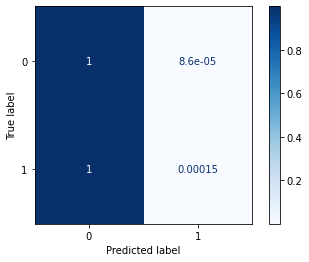

In [28]:
disp = plot_confusion_matrix(clf, xtrain, ytrain,
                             display_labels=[0,1],
                             cmap=plt.cm.Blues,
                             normalize="true")
plt.show()

## SVM

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [63]:
from sklearn.linear_model import LogisticRegression
clf = svm.SVC(kernel='linear',class_weight={0:1,1:1} ) 
scores = cross_val_score(clf1, X, y, cv=10, scoring = make_scorer(accuracy_score))
print(scores)
print("*****"*10)
print("Accuracy: ", scores.mean())

[nan nan nan nan nan nan nan nan nan nan]
**************************************************
Accuracy:  nan


/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'W.E.P. 5734'

  FitFailedWarning)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'A/5 21171'

  FitFailedWarning)
/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'A/5 21171'

  FitFailedWarning)
/Users/rociocuestapedraz/opt/anacon

In [41]:
df1=pd.read_csv("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/titanic 1.csv")
df2=pd.read_csv("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/titanic 2.csv")

In [42]:
df= pd.merge(left=df1, right=df2, on =['PassengerId'])
df.head()

,PassengerId,Name,Sex,Age,Survived,Pclass,Ticket,Fare
0,1,"Braund, Mr. Owen Harris",male,22.0,0,3,A/5 21171,7.2500
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,1,PC 17599,71.2833
2,3,"Heikkinen, Miss. Laina",female,26.0,1,3,STON/O2. 3101282,7.9250
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,1,113803,53.1000
4,5,"Allen, Mr. William Henry",male,35.0,0,3,373450,8.0500


In [43]:
df.drop(["Name"], axis='columns', inplace=True)
df.drop(["Ticket"], axis='columns', inplace=True)
df.drop(["Fare"], axis='columns', inplace=True)

In [ ]:
#Transformar a dummys:
categories=["municipio","room_type"]
for category in categories:
        cat_dummies=pd.get_dummies(df[category],prefix=category)
        df=df.join(cat_dummies)
        df.drop([category], axis='columns', inplace=True)

In [44]:
df.head()

,PassengerId,Sex,Age,Survived,Pclass
0,1,male,22.0,0,3
1,2,female,38.0,1,1
2,3,female,26.0,1,3
3,4,female,35.0,1,1
4,5,male,35.0,0,3


In [45]:
df.dtypes

PassengerId      int64
Sex             object
Age            float64
Survived         int64
Pclass           int64
dtype: object

In [46]:
#Transformar a dummys:
categories=["Sex","Pclass"]
for category in categories:
        cat_dummies=pd.get_dummies(df[category],prefix=category)
        df=df.join(cat_dummies)
        df.drop([category], axis='columns', inplace=True)

In [47]:
df.head()

,PassengerId,Age,Survived,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,0,0,1,0,0,1
1,2,38.0,1,1,0,1,0,0
2,3,26.0,1,1,0,0,0,1
3,4,35.0,1,1,0,1,0,0
4,5,35.0,0,0,1,0,0,1


In [48]:
df.drop(['Sex_male'], axis='columns', inplace=True)
df.drop(['Pclass_1'], axis='columns', inplace=True)
df.drop(['PassengerId'], axis='columns', inplace=True)

In [49]:
df.head()

,Age,Survived,Sex_female,Pclass_2,Pclass_3
0,22.0,0,0,0,1
1,38.0,1,1,0,0
2,26.0,1,1,0,1
3,35.0,1,1,0,0
4,35.0,0,0,0,1


In [55]:
df.isnull().values.any()

True

In [56]:
#Miro % de NANS
for col in df.columns:
    suma_nans=pd.isnull(df[col]).values.ravel().sum()
    print(col,"=",(suma_nans/df.shape[0])*100,"%")

Age = 19.865319865319865 %
Survived = 0.0 %
Sex_female = 0.0 %
Pclass_2 = 0.0 %
Pclass_3 = 0.0 %


In [57]:
df= df.dropna(axis=0, subset=["Age"])

In [58]:
X=df[["Age","Sex_female","Pclass_2","Pclass_3"]]
y=df["Survived"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (499, 4) (499,)
Test set: (215, 4) (215,)


In [60]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy_score(y_test, yhat)

0.7767441860465116